
# Random Forest Proyecto

Para este proyecto, se explorarán los datos disponibles públicamente de [LendingClub.com] (www.lendingclub.com). Lending Club conecta a personas que necesitan dinero (prestatarios) con personas que tienen dinero (inversores). Es de esperar que, como inversor, desee invertir en personas que mostraron un perfil de alta probabilidad de reembolso. Intentaremos crear un modelo que ayude a predecir esto.

El club de préstamos tuvo un [año muy interesante en 2016] (https://en.wikipedia.org/wiki/Lending_Club#2016), así que se verán algunos de sus datos teniendo en cuenta el contexto. Esta información es de antes incluso de que se hiciera pública.

Se utilizarán los datos de préstamos de 2007-2010 e intentaremos clasificar y predecir si el prestatario pagó o no su préstamo en su totalidad. Se pueden descargar los datos desde [aquí] (https://www.lendingclub.com/info/download-data.action) o simplemente usar el csv ya proporcionado. Se recomienda que use la csv proporcionada ya que se ha limpiado de los valores de NA.

Esto es lo que representan las columnas:
* credit.policy: 1 si el cliente cumple con los criterios de suscripción de crédito de LendingClub.com y 0 de lo contrario.
* purpose (propósit): El propósito del préstamo (toma valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", y "all_other").
* int.rate: la tasa de interés del préstamo, como proporción (una tasa del 11% se almacenará como 0.11). Los prestatarios juzgados por LendingClub.com como más arriesgados se les asignan tasas de interés más altas.
* installment (cuota): las cuotas mensuales adeudadas por el prestatario si el préstamo está financiado.
* log.annual.inc: el registro natural del ingreso anual autoinformado del prestatario.
* dti: la relación deuda-ingreso del prestatario (cantidad de deuda dividida por el ingreso anual).
* fico: puntaje de crédito FICO del prestatario.
* days.with.cr.line: el número de días que el prestatario ha tenido una línea de crédito.
* revol.bal: el saldo revolvente del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta de crédito).
* revol.util: la tasa de utilización de la línea rotativa del prestatario (el monto de la línea de crédito utilizada en relación con el crédito total disponible).
* inq.last.6mths: el número de consultas realizadas por los acreedores en los últimos 6 meses.
* delinq.2yrs: la cantidad de veces que el prestatario ha tenido más de 30 días de vencido en un pago en los últimos 2 años.
* pub.rec: el número de registros públicos despectivos del prestatario (declaraciones de bancarrota, gravámenes fiscales o juicios).

# Importando Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importando los Datos

** Importamos los Datos en un dataframe llamado prest.**

In [2]:
prest = pd.read_csv('loan_data.csv')

In [3]:
prest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
prest.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
prest.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análisis Exploratorio de Datos

Solo para obtener la idea principal de como están agrupados los datos.

** Se crea un histograma de dos distribuciones FICO una encima de la otra, una para cada resultado de credit.policy. **

* Se necesita una línea de código para cada histograma, también te recomiendo que uses pandas integradas en .hist () *

Text(0.5,0,'FICO')

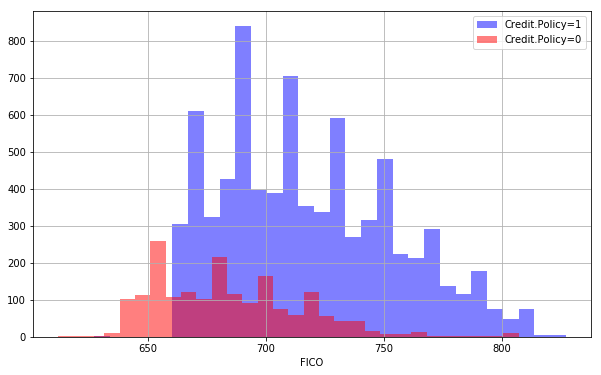

In [6]:
plt.figure(figsize=(10,6))
prest[prest['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
prest[prest['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Creamos otra figura similar, pero pivotada (por) la columna not.fully.paid.**

Text(0.5,0,'FICO')

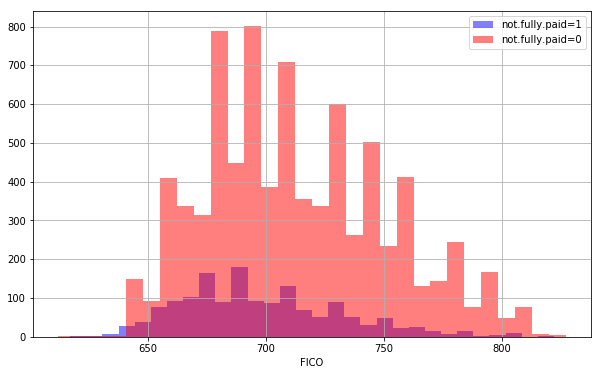

In [7]:
plt.figure(figsize=(10,6))
prest[prest['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
prest[prest['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Ahora se hace un recuento utilizando seaborn mostrando los recuentos de préstamos por finalidad, con el color o matiz (hue) definido por la columna non.fully.paid. **

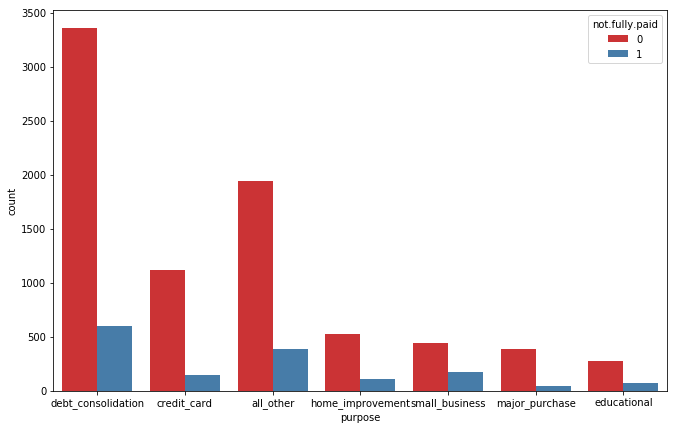

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=prest,palette='Set1')

**Observamos la tendencia entre el puntaje FICO y la tasa de interés para darnos una idea de su relación y correclación, posteriorment creamos la siguiente gráfica conjunta.**

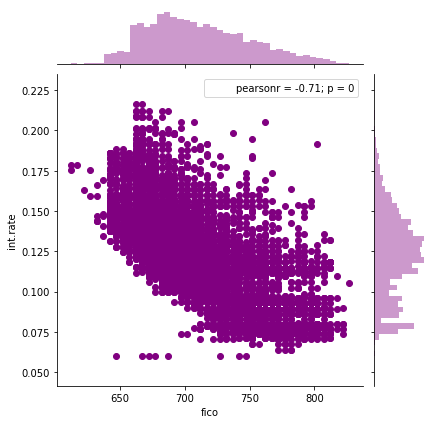

In [9]:
sns.jointplot(x='fico',y='int.rate',data=prest,color='purple')

** Posteriormente se realizan algunos lmplots para ver si la tendencia difiere entre las columnas de not.fully.paid y credit.policy.**

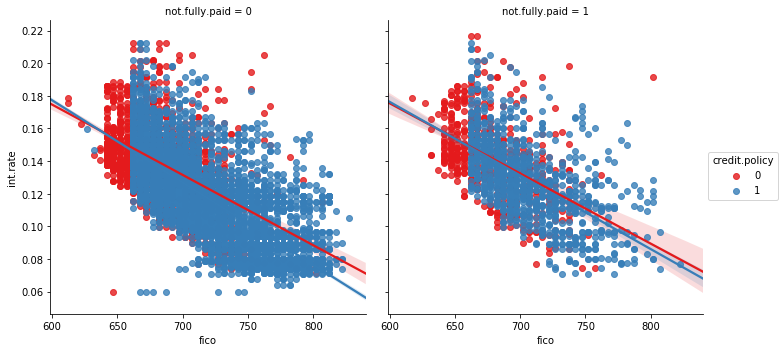

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=prest,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Preparando los datos

**Usamos prest.info().**

In [11]:
prest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Características categóricas (Categorical Features)

Observe que la columna ** purpose ** es categórica

Eso significa que se tienen que transformar usando variables ficticias para que sklearn pueda entenderlos. Se hace esto en un solo paso usando pd.get_dummies.

Hay formas de tratar con estas columnas que, de ser necesario, se puede expandir a múltiples características categóricas.

** Para esto se crea una lista de 1 elemento que contiene la cadena purpose. Esta lista se llamará cat_feats.**

In [12]:
cat_feats = ['purpose']

** Ahora se usa pd.get_dummies (prest, columns = cat_feats, drop_first = True) para crear un dataframe de mayor tamaño que tenga nuevas columnas de características con variables ficticias. Posteriormente, se establece este marco de datos como final_datos. **

In [13]:
final_datos = pd.get_dummies(prest,columns=cat_feats,drop_first=True)

In [14]:
final_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Separación de conjuntos

** Usamos sklearn para dividir sus datos en un conjunto de entrenamient y un conjunto de prueba como se ha hecho en el pasado. **

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_datos.drop('not.fully.paid',axis=1)
y = final_datos['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Entrenando nuestro árbol de desiciones

Primeros empezando importando y entrenando un árbol de desición (antes de entrenar nuesto "bosque" (Random Forest)

** Import DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

**Creamos una instancia de DecisionTreeClassifier() llamada darbol y la entrenamos con el conjunto de entrenamiento.**

In [18]:
darbol = DecisionTreeClassifier()

In [19]:
darbol.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predicciones y Evaluación del Árbol de Decisión
** Creamos predicciones a partir del conjunto de pruebas y además un informe de clasificación y una matriz de confusión. **

In [21]:
predic = darbol.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predic))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



In [24]:
print(confusion_matrix(y_test,predic))

[[1997  434]
 [ 342  101]]


## Entrenando el modelo Random Forest (nuestro "bosque")


** Se crea una instancia de la clase RandomForestClassifier y se ajusta a nuestros datos de entrenamiento del paso anterior. **

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=600)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predicciones y Evaluación

Se predicen los valores y_test y evaluar nuestro modelo.

** Predecir la clase de no .fully.paid para los datos X_test. **

In [28]:
pred = rfc.predict(X_test)

** Ahora se crea un informe de clasificación a partir de los resultados. (Los resultados muestran cosas extrañas) **

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.48      0.02      0.04       443

avg / total       0.79      0.85      0.78      2874



**Ahora la matriz de la confusión.**

In [31]:
print(confusion_matrix(y_test,pred))

[[2420   11]
 [ 433   10]]


** Conclusión: ¿Cual de los dos dió mejr resultado: el árbol de des o el random forest?**

In [32]:
# Depende de qué medida está tratando de optimizar.
# Obserando el retiro para cada clase para los modelos.
# Tampoco le fue muy bien, se necesita más ingeniería de características.

# Mario Duran